In [ ]:
#Description : This is a sentiment analysis program that parses the tweets fetched from Twitter using Python

In [ ]:
# Import the libraries
import tweepy #python library to access twitter api
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# Get the data
consumer_key = '###'
consumer_secret = '###'
access_token = '###'
access_token_secret = '###'
bearer_token = '###'

In [ ]:
# # Create the authentication object
# authenticate = tweepy.OAuthHandler(consumer_key, consumer_secret)

# #Set the access token and access token secret
# authenticate.set_access_token(access_token, access_token_secret)

# #Create the API object while passing in the auth information
# api = tweepy.API(authenticate)

In [ ]:
client = tweepy.Client(bearer_token=bearer_token)

In [ ]:
query = 'from:elonmusk'

posts = client.search_recent_tweets(query=query, max_results=100)

for tweet in posts.data[0:5]:
    print(tweet.text)

@EndWokeness 😂😂😂😂
@EndWokeness Not oppressed
@MuskUniversity Let that sink in
Hosting @RobertKennedyJr’s upcoming Space https://t.co/pJr78Q7qAr
@jordanbpeterson “gender-affirming care for minors” is pure evil


In [ ]:
# # Extract 100 tweets from the twitter user
# posts = api.home_timeline(count = 100)

# # Print the last 5 tweets from the account
# print("Show the 5 recent tweets \n")
# for tweet in posts[0:5]:
#   print(tweet.text + "\n")

In [ ]:
#Create a dataframe with a column called Tweets
df = pd.DataFrame([tweet.text for tweet in posts.data], columns=['Tweets'])

#Show the first 5 rows of data
df.head()

,Tweets
0,@EndWokeness 😂😂😂😂
1,@EndWokeness Not oppressed
2,@MuskUniversity Let that sink in
3,Hosting @RobertKennedyJr’s upcoming Space http...
4,@jordanbpeterson “gender-affirming care for mi...


In [ ]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
  text = re.sub(r'@[_a-zA-Z0-9]+', '', text) #Removes @mentions
  text = re.sub(r'#', '', text) #Removes Hashtag
  text = re.sub(r'RT[\s]+', '', text) #removing retweets
  text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlink
  #text = re.sub('[\u2700-\u27BF]|[\uE000-\uF8FF]|\uD83C[\uDC00-\uDFFF]|\uD83D[\uDC00-\uDFFF]|[\u2011-\u26FF]|\uD83E[\uDD10-\uDDFF]', '', text)

  return text

#Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df.head()

,Tweets
0,😂😂😂😂
1,Not oppressed
2,Let that sink in
3,Hosting ’s upcoming Space
4,“gender-affirming care for minors” is pure evil


In [ ]:
# Create a function to get the subjectivity 
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe
df.head()

,Tweets,Subjectivity,Polarity
0,😂😂😂😂,0.00,0.000000
1,Not oppressed,0.00,0.000000
2,Let that sink in,0.00,0.000000
3,Hosting ’s upcoming Space,0.00,0.000000
4,“gender-affirming care for minors” is pure evil,0.75,-0.392857


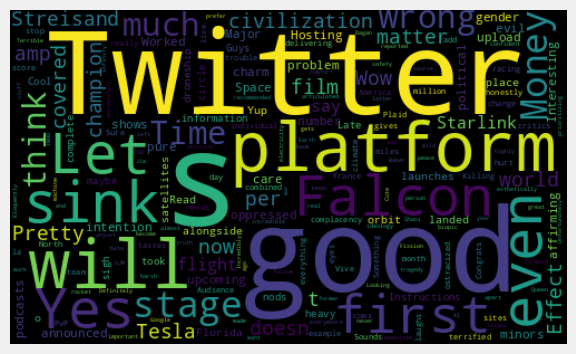

In [ ]:
#Plot the word cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [ ]:
#Create a function to compute the negative, neutral and positive analysis

def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

df

,Tweets,Subjectivity,Polarity,Analysis
0,😂😂😂😂,0.00,0.000000,Neutral
1,Not oppressed,0.00,0.000000,Neutral
2,Let that sink in,0.00,0.000000,Neutral
3,Hosting ’s upcoming Space,0.00,0.000000,Neutral
4,“gender-affirming care for minors” is pure evil,0.75,-0.392857,Negative
...,...,...,...,...
94,What are they talking about?,0.00,0.000000,Neutral
95,Not me or X/Twitter. Others are paying to pro...,0.00,0.000000,Neutral
96,Let that sink in,0.00,0.000000,Neutral
97,Yes,0.00,0.000000,Neutral


In [ ]:
# Print all the negative tweets
j=1
sortedDF = df.sort_values(by=['Polarity'])
for i in range(0, sortedDF.shape[0]):
  if sortedDF['Analysis'][i] == 'Negative':
    print(str(j) + ') '+sortedDF['Tweets'][i])
    print()
    j = j+1

1)  “gender-affirming care for minors” is pure evil

2)  [heavy sigh] nods

3)  Late stage civilization complacency

4)  They trouble me esthetically

5)   Terrible

6)  That would be insane



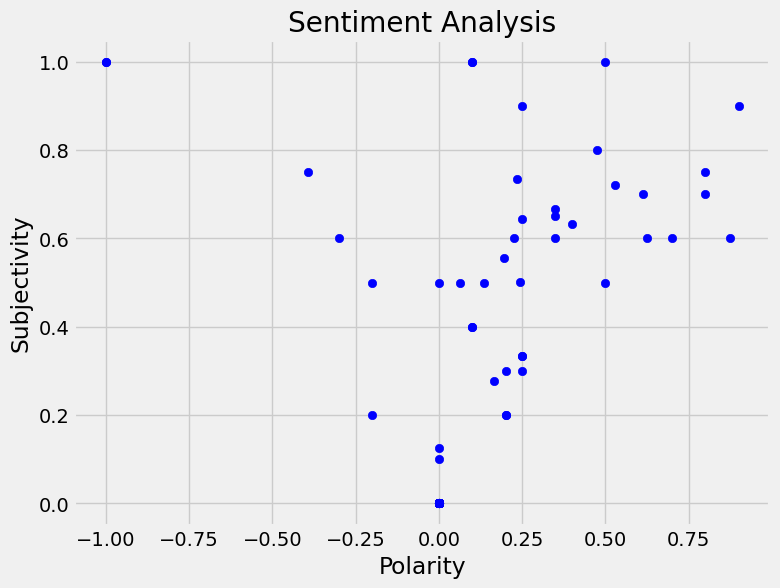

In [ ]:
#Plot the polarity and subjectivity

plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [ ]:
# Get the percentage of different tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

ntweets = df[df.Analysis == 'Neutral']
ntweets = ntweets['Tweets']

ngtweets = df[df.Analysis == 'Negative']
ngtweets = ngtweets['Tweets']

print('Positive: ', (ptweets.shape[0]/df.shape[0] *100))
print('Neutral: ', (ntweets.shape[0]/df.shape[0] *100))
print('Negative: ', (ngtweets.shape[0]/df.shape[0] *100))

Positive:  34.34343434343434
Neutral:  59.59595959595959
Negative:  6.0606060606060606


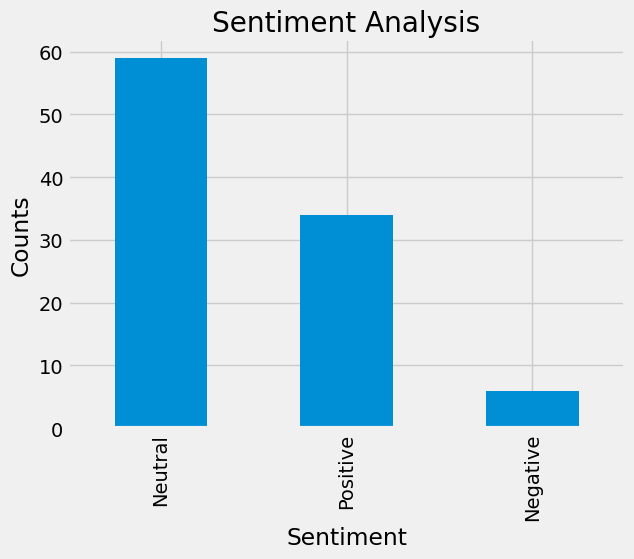

In [ ]:
#Show the value counts

df['Analysis'].value_counts()

#plot the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()